# Traffic analysis on I-94 Interstate highway.

The goal of our analysis is to determine some indicators of heavy traffic on I-94 using exploratory data and and visualizations. 

A station located approximately midway between Minneapolis and Saint Paul recorded the traffic data. Also, the station only records westbound traffic (cars moving from east to west).

The dataset is available here: https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
i94traffic = pd.read_csv('Metro_Interstate_Traffic_Volume.csv.gz')
i94traffic['date_time'] = pd.to_datetime(i94traffic['date_time'])

Extracting hour of the day from the datetime field:

In [4]:
i94traffic['time'] = i94traffic['date_time'].dt.hour
i94traffic['time'] = i94traffic['time'].astype('int')
i94traffic['day_of_week'] = i94traffic['date_time'].dt.weekday
i94traffic['month'] = i94traffic['date_time'].dt.month

In [5]:
i94traffic.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,time,day_of_week,month
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,9,1,10
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,10,1,10
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,11,1,10
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,12,1,10
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,13,1,10


__Traffic distribution:__ Distribution of observed traffic volume for all data points.

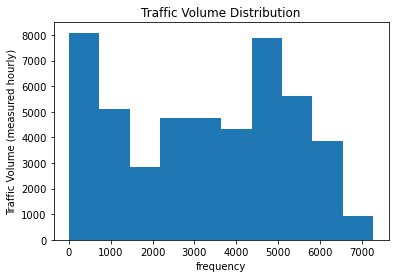

In [6]:
plt.hist(x = i94traffic['traffic_volume'])
plt.xlabel('frequency')
plt.ylabel('Traffic Volume (measured hourly)')
plt.title('Traffic Volume Distribution')
plt.show()

In [7]:
i94traffic['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

<ul>
<li>Bottom 25% of the observations show a traffic volume of 1193 cars or less</li>
<li>Top 25% show a traffic volume of 4933 or more cars</li>
</ul>

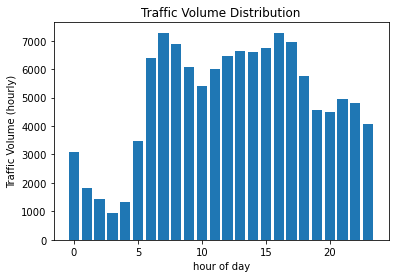

In [8]:
plt.bar(i94traffic['time'], i94traffic['traffic_volume'] )
plt.xlabel('hour of day')
plt.ylabel('Traffic Volume (hourly)')
plt.title('Traffic Volume Distribution')
plt.show()

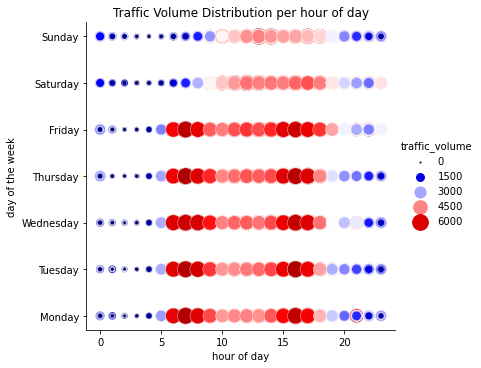

In [9]:
sns.relplot(data=i94traffic, x='time', y='day_of_week',
            hue='traffic_volume', palette='seismic',
           size='traffic_volume', sizes=(1,300))
plt.xlabel('hour of day')
plt.ylabel('day of the week')
plt.yticks( [0,1,2,3,4,5,6]
           ,['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday',])
plt.title('Traffic Volume Distribution per hour of day')
plt.show()


Filtering and splitting day and nighttime to be able to analyze both sub-sets separately.

In [10]:
mask01 = i94traffic['time'] >= 7
mask02 = i94traffic['time'] < 19
mask03 = i94traffic['time'] < 7
mask04 = i94traffic['time'] >= 19

In [11]:
i94traffic_day = i94traffic[mask01 & mask02]

In [12]:
i94traffic_day.describe()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,time,day_of_week,month
count,23877.000000,23877.00000,23877.000000,23877.000000,23877.000000,23877.000000,23877.000000,23877.000000
mean,282.257596,0.53306,0.000253,53.122000,4762.047452,12.431419,2.983457,6.522218
std,13.298885,63.62932,0.008853,37.564588,1174.546482,3.473405,2.007363,3.407585
min,0.000000,0.00000,0.000000,0.000000,0.000000,7.000000,0.000000,1.000000
25%,272.680000,0.00000,0.000000,5.000000,4252.000000,9.000000,1.000000,4.000000
50%,283.780000,0.00000,0.000000,75.000000,4820.000000,12.000000,3.000000,7.000000
75%,293.440000,0.00000,0.000000,90.000000,5559.000000,15.000000,5.000000,9.000000
max,310.070000,9831.30000,0.510000,100.000000,7280.000000,18.000000,6.000000,12.000000


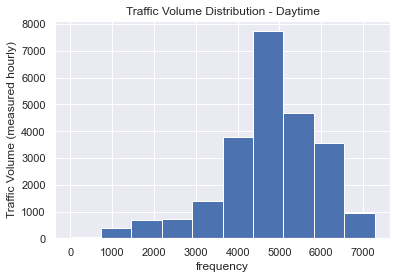

In [13]:
sns.set_theme()
plt.hist(x = i94traffic_day['traffic_volume'])
plt.xlabel('frequency')
plt.ylabel('Traffic Volume (measured hourly)')
plt.title('Traffic Volume Distribution - Daytime')
plt.show()

In [14]:
i94traffic_night = i94traffic[mask03 | mask04]

In [15]:
i94traffic_night.describe()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,time,day_of_week,month
count,24327.000000,24327.000000,24327.000000,24327.000000,24327.000000,24327.000000,24327.000000,24327.000000
mean,280.173600,0.139145,0.000192,45.672011,1785.377441,10.384018,2.986476,6.490155
std,13.296357,1.110872,0.007434,40.048382,1441.951197,9.029227,2.004584,3.392973
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,271.700000,0.000000,0.000000,1.000000,530.000000,2.000000,1.000000,4.000000
50%,281.379000,0.000000,0.000000,40.000000,1287.000000,5.000000,3.000000,7.000000
75%,290.700000,0.000000,0.000000,90.000000,2819.000000,20.000000,5.000000,9.000000
max,307.680000,55.630000,0.510000,100.000000,6386.000000,23.000000,6.000000,12.000000


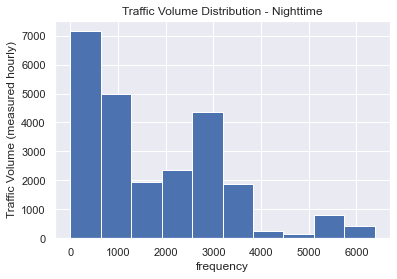

In [16]:
plt.hist(x = i94traffic_night['traffic_volume'])
plt.xlabel('frequency')
plt.ylabel('Traffic Volume (measured hourly)')
plt.title('Traffic Volume Distribution - Nighttime')
plt.show()

From now on, we will focus on daytime data only:

In [17]:
i94t_day_by_month = i94traffic_day.groupby('month').mean()
i94t_day_by_month['traffic_volume'].astype(int)

month
1     4495
2     4711
3     4889
4     4906
5     4911
6     4898
7     4595
8     4928
9     4870
10    4921
11    4704
12    4374
Name: traffic_volume, dtype: int32

__Average traffic volume during daytime, from 7:00 to 19:00, grouped by month:__

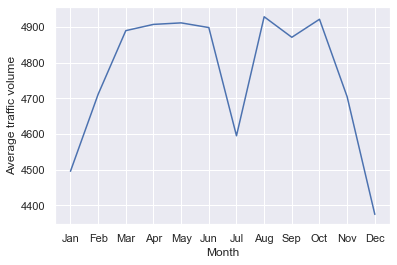

In [18]:
plt.plot(i94t_day_by_month['traffic_volume'])
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12]
           , ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.xlabel('Month')
plt.ylabel('Average traffic volume')
plt.show()

In [19]:
i94t_day_by_DoW = i94traffic_day.groupby('day_of_week').mean()
i94t_day_by_DoW['traffic_volume'] 

day_of_week
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64

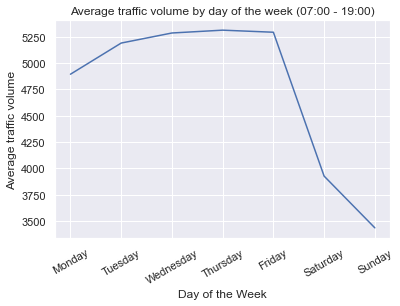

In [20]:
plt.plot(i94t_day_by_DoW['traffic_volume'])
plt.xticks([0,1,2,3,4,5,6]
           ,['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday',]
           , rotation = 30)
plt.xlabel('Day of the Week')
plt.ylabel('Average traffic volume')
plt.title('Average traffic volume by day of the week (07:00 - 19:00)')
plt.show()

In [21]:
bussiness_days = i94traffic_day.copy()[i94traffic_day['day_of_week'] <= 4] # 4 == Friday
weekend = i94traffic_day.copy()[i94traffic_day['day_of_week'] >= 5] # 5 == Saturday
by_hour_business = bussiness_days.groupby('time').mean().astype(int).reset_index()
by_hour_weekend = weekend.groupby('time').mean().astype(int).reset_index()

print(by_hour_business['traffic_volume'])

0     6030
1     5503
2     4895
3     4378
4     4633
5     4855
6     4859
7     5152
8     5592
9     6189
10    5784
11    4434
Name: traffic_volume, dtype: int32


In [22]:
print(by_hour_weekend['traffic_volume'])

0     1589
1     2338
2     3111
3     3686
4     4044
5     4372
6     4362
7     4358
8     4342
9     4339
10    4151
11    3811
Name: traffic_volume, dtype: int32


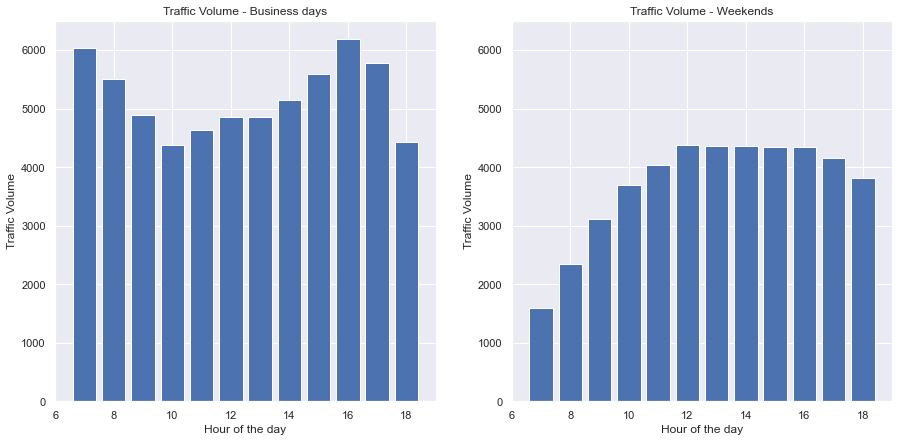

In [23]:
plt.figure(figsize=(15,7))
plt.subplot(1, 2, 1)
plt.bar(by_hour_business['time'],by_hour_business['traffic_volume'])
plt.title('Traffic Volume - Business days')
plt.xlabel('Hour of the day')
plt.ylabel('Traffic Volume')
plt.axis([6, 19, 0, 6500])
plt.subplot(1, 2, 2)
plt.bar(by_hour_weekend['time'],by_hour_weekend['traffic_volume'])
plt.title('Traffic Volume - Weekends')
plt.xlabel('Hour of the day')
plt.ylabel('Traffic Volume')
plt.axis([6, 19, 0, 6500])
plt.show()

__Conclusion:__
<ul>
<li>The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).</li>
<li>The traffic is usually heavier on business days compared to weekends.</li>
<li>On business days, the rush hours are around 7 and 16.</li>
</ul>

In [24]:
by_weather_main = i94traffic_day.groupby('weather_main').mean().reset_index()
print(by_weather_main)

    weather_main        temp   rain_1h   snow_1h  clouds_all  traffic_volume  \
0          Clear  283.812078  0.000000  0.000000    1.670265     4778.416260   
1         Clouds  282.929274  0.000000  0.000000   62.667548     4865.415996   
2        Drizzle  284.456433  0.170804  0.000000   84.704417     4837.212911   
3            Fog  277.579641  0.163840  0.001409   65.477901     4372.491713   
4           Haze  275.319353  0.040036  0.000000   64.000000     4609.893285   
5           Mist  279.420825  0.249992  0.000825   74.961435     4623.976475   
6           Rain  287.089601  3.972943  0.000292   75.870116     4815.568462   
7          Smoke  292.405833  0.878333  0.000000   53.333333     4564.583333   
8           Snow  267.984505  0.014017  0.001768   80.501376     4396.321183   
9         Squall  296.730000  1.020000  0.000000   75.000000     4211.000000   
10  Thunderstorm  293.364678  1.146475  0.000000   75.184035     4648.212860   

         time  day_of_week     month  


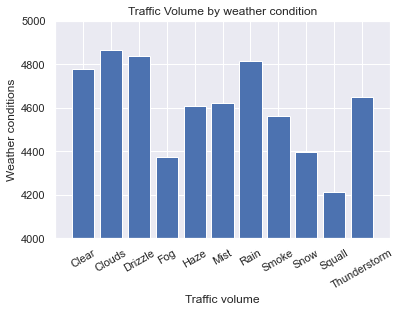

In [25]:
plt.bar(by_weather_main['weather_main'], by_weather_main['traffic_volume'])
plt.xticks(rotation = 30)
plt.axis([-1,11,4000, 5000])
plt.xlabel('Traffic volume')
plt.ylabel('Weather conditions')
plt.title('Traffic Volume by weather condition')
plt.show()

In [26]:
by_weather_description = i94traffic_day.groupby('weather_description').mean().reset_index()
print(by_weather_description)

                    weather_description        temp      rain_1h   snow_1h  \
0                               SQUALLS  296.730000     1.020000  0.000000   
1                          Sky is Clear  293.232549     0.000000  0.000000   
2                         broken clouds  282.372927     0.000000  0.000000   
3                               drizzle  283.573777     0.145072  0.000000   
4                            few clouds  284.272965     0.000000  0.000000   
5                                   fog  277.579641     0.163840  0.001409   
6                         freezing rain  272.860000     0.000000  0.000000   
7                                  haze  275.319353     0.040036  0.000000   
8               heavy intensity drizzle  285.467931     0.276207  0.000000   
9                  heavy intensity rain  290.231781     2.670548  0.000000   
10                           heavy snow  269.256188     0.002375  0.000000   
11              light intensity drizzle  284.902199     0.178848

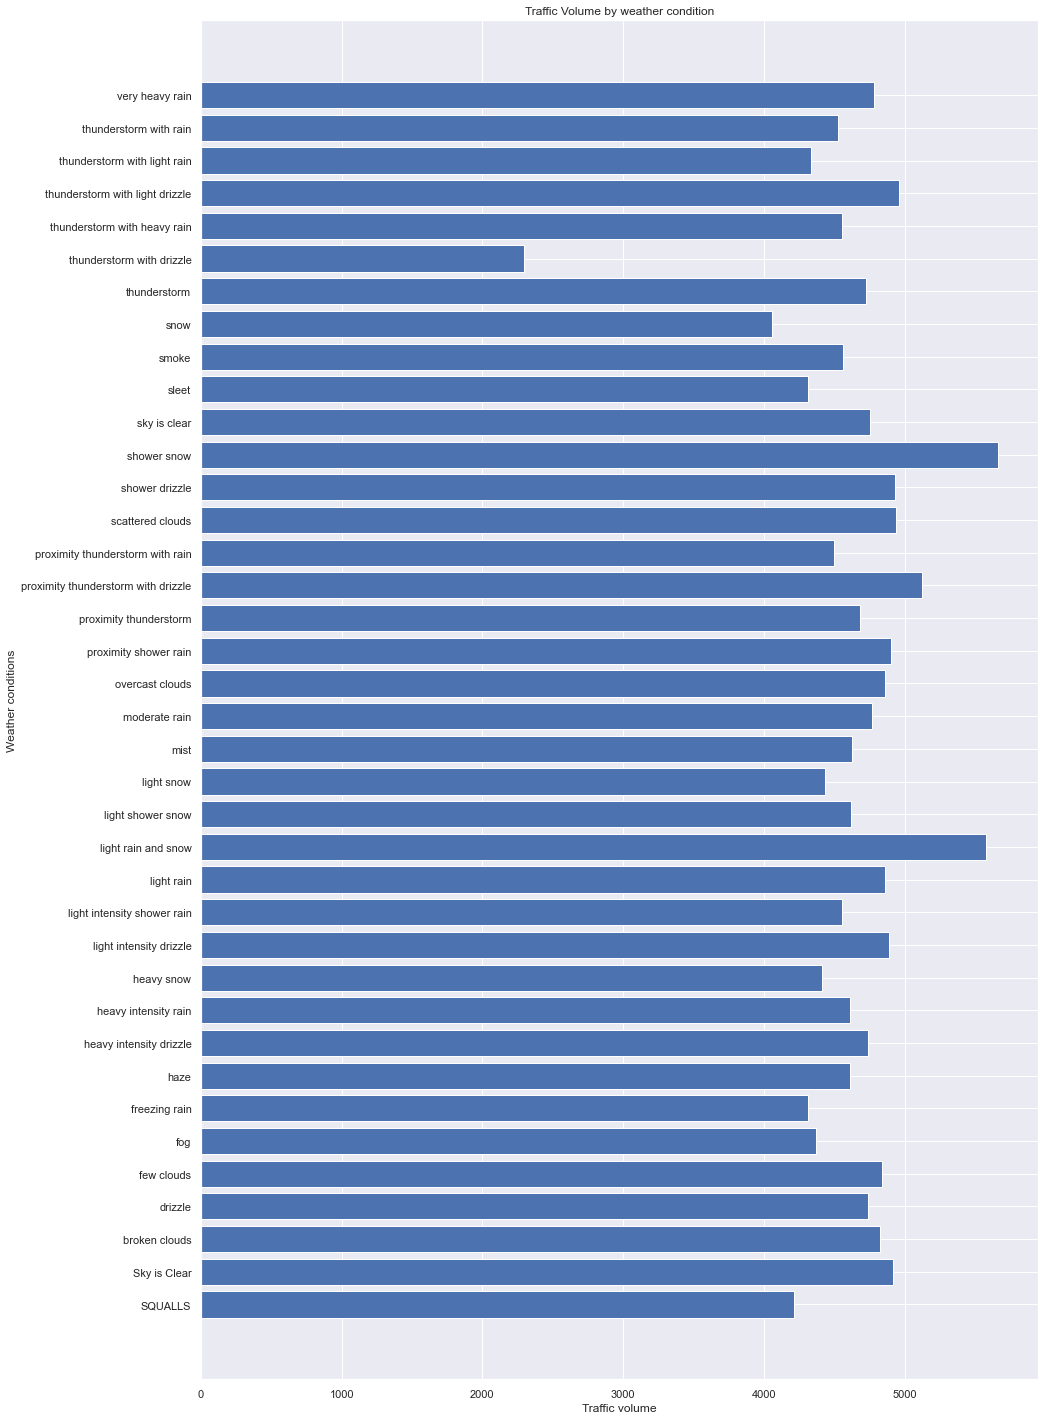

In [27]:
plt.figure(figsize=(15,25))
plt.barh(by_weather_description['weather_description'], by_weather_description['traffic_volume'])
plt.xlabel('Traffic volume')
plt.ylabel('Weather conditions')
plt.title('Traffic Volume by weather condition')
plt.show()

__Conclusion:__
<ul>
<li>Light rain and snow & shower snow show significant differences, with a higher traffic volume.</li>
<li>Days with thunderstorm with drizzle, the traffic volume was much lower.</li>
</ul>

If we check days with thunderstorm with drizzle, we only see 2 records, both on Saturday and it is not possible to determine the impact this weather condition has over traffic.

In [28]:
mask05 = i94traffic['weather_description'] == 'thunderstorm with drizzle'
i94traffic[mask05]

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,time,day_of_week,month
9898,None,280.46,1.27,0.0,90,Thunderstorm,thunderstorm with drizzle,2013-11-16 13:00:00,4592,13,5,11
25172,None,295.30,9.42,0.0,90,Thunderstorm,thunderstorm with drizzle,2016-07-23 12:00:00,2,12,5,7


In [29]:
weather_conditions = i94traffic_day['weather_description'].reset_index()
count_weather_description = weather_conditions.groupby('weather_description').count().reset_index()

In [30]:
count_weather_description

,weather_description,index
0,SQUALLS,1
1,Sky is Clear,852
2,broken clouds,2793
3,drizzle,278
4,few clouds,1143
5,fog,362
6,freezing rain,2
7,haze,834
8,heavy intensity drizzle,29
9,heavy intensity rain,219


__Weather conditions occurrence__

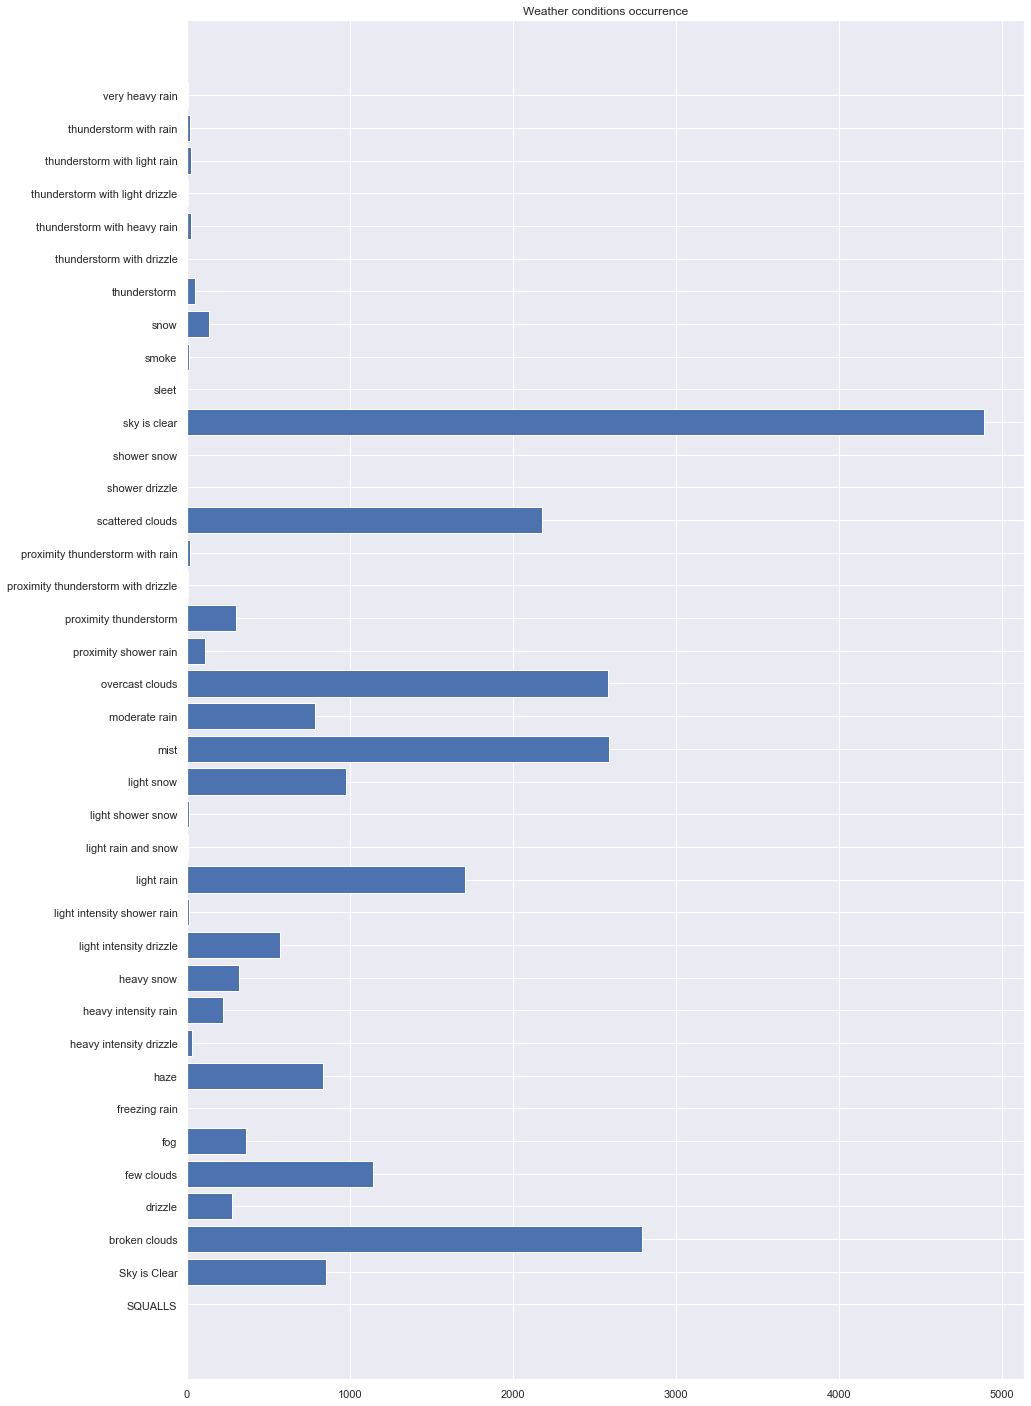

In [31]:
plt.figure(figsize=(15,25))
plt.barh(count_weather_description['weather_description'], count_weather_description['index'])
plt.title('Weather conditions occurrence')
plt.show()

__That was it for today!__